# Tutorial de Análise de Dados em Python

Neste tutorial, você aprenderá a realizar várias tarefas de visualização de dados e análise estatística usando Python. Utilizaremos o popular **conjunto de dados Titanic**, que contém informações sobre os passageiros a bordo do Titanic, incluindo se sobreviveram, sua idade, classe e mais.

Abordaremos os seguintes tópicos:

1. **Carregando o Conjunto de Dados Titanic**
2. **Criando um Histograma**
3. **Criando um Boxplot**
4. **Criando um Violin Plot**
5. **Criando um Scatterplot**
6. **Calculando Estatísticas Básicas**
7. **Criando uma Nova Coluna com Quartis**
8. **Criando um Gráfico de Barras**
9. **Criando um Gráfico de Pizza**

Vamos começar!



## 1. Carregando o Conjunto de Dados Titanic

Primeiro, vamos carregar o conjunto de dados Titanic usando a biblioteca `seaborn`, que já possui o conjunto de dados incorporado. Também importaremos as bibliotecas necessárias para manipulação de dados e visualização.



In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.style.use('ggplot')

# Carrega o conjunto de dados Titanic
titanic = sns.load_dataset('titanic')

# Exibe as primeiras linhas
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Criando um Histograma

Um **histograma** exibe a distribuição de uma variável numérica mostrando a frequência de pontos de dados dentro de intervalos específicos (bins).



### Exemplo: Distribuição de Idades



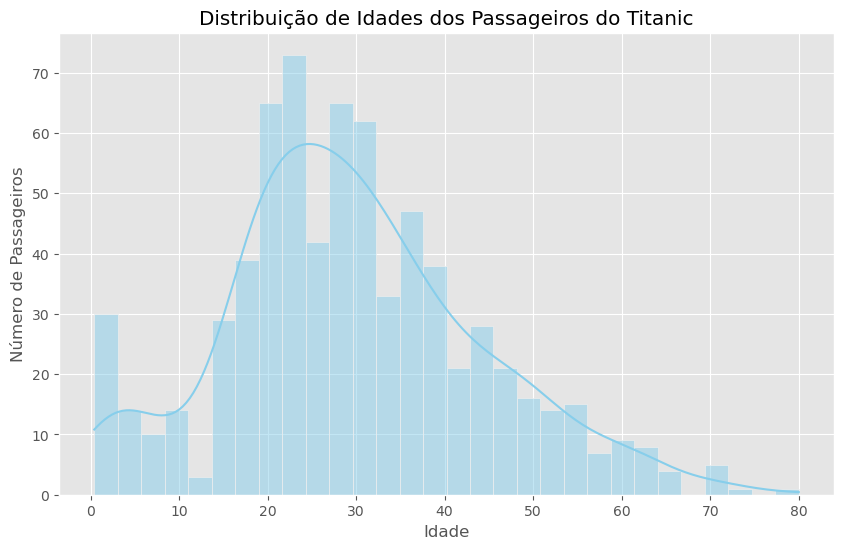

In [4]:
# Plota um histograma das idades dos passageiros
plt.figure(figsize=(10,6))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Idades dos Passageiros do Titanic')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.show()




**Explicação:**
- `dropna()` remove valores ausentes para evitar erros.
- `bins=30` divide a faixa de idades em 30 intervalos.
- `kde=True` adiciona uma linha de Estimativa de Densidade do Kernel para mostrar a forma da distribuição.

## 3. Criando um Boxplot

Um **boxplot** resume os dados usando a mediana, quartis e possíveis outliers.

### Exemplo: Tarifa por Classe de Passageiro


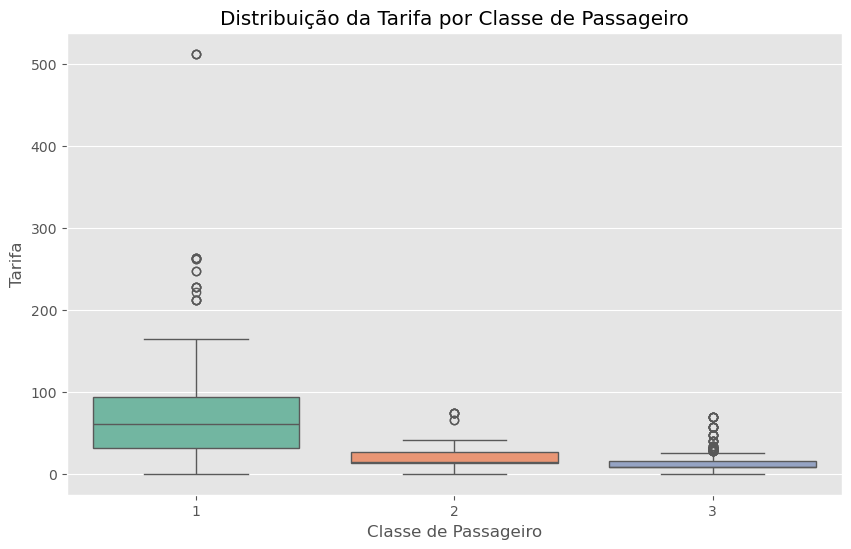

In [8]:

# Plota um boxplot da tarifa por classe de passageiro
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='fare', data=titanic, palette='Set2')
plt.title('Distribuição da Tarifa por Classe de Passageiro')
plt.xlabel('Classe de Passageiro')
plt.ylabel('Tarifa')
plt.show()




**Explicação:**
- `x='pclass'` agrupa os dados por classe de passageiro.
- `y='fare'` plota a distribuição das tarifas dentro de cada classe.

## 4. Criando um Violin Plot



Um **violin plot** combina um boxplot e um gráfico de densidade do kernel, mostrando a distribuição e a densidade de probabilidade dos dados.

### Exemplo: Distribuição de Idades por Gênero



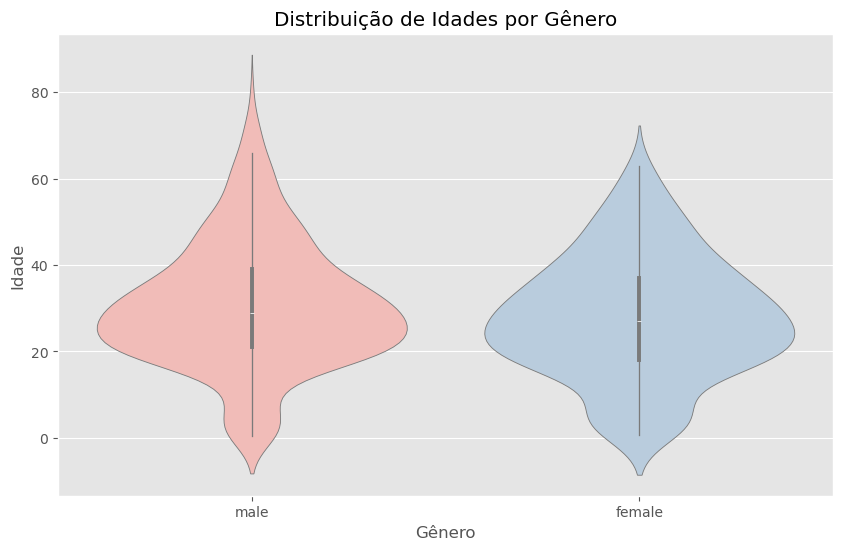

In [12]:
# Plota um violin plot da idade por gênero
plt.figure(figsize=(10,6))
sns.violinplot(x='sex', y='age', data=titanic, palette='Pastel1')
plt.title('Distribuição de Idades por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()


**Explicação:**
- `x='sex'` separa os dados por gênero.
- `y='age'` mostra a distribuição de idades para cada gênero.

## 5. Criando um Scatterplot

Um **scatterplot** exibe a relação entre duas variáveis numéricas.

### Exemplo: Idade vs. Tarifa



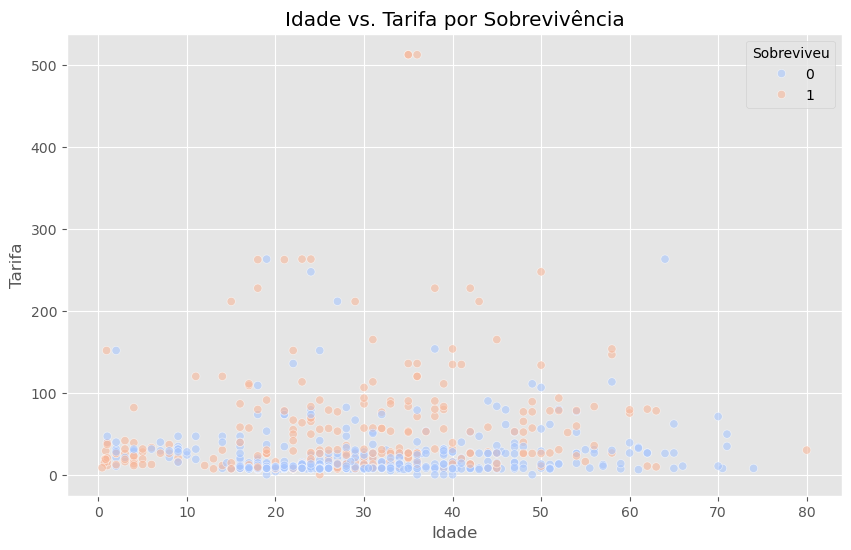

In [15]:
# Plota um scatterplot da idade vs. tarifa
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, palette='coolwarm', alpha=0.6)
plt.title('Idade vs. Tarifa por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Sobreviveu')
plt.show()


**Explicação:**
- `hue='survived'` colore os pontos com base no status de sobrevivência.
- `alpha=0.6` torna os pontos semi-transparentes para lidar com sobreposições.



**Outros exemplos:**

Coeficiente de Pearson (Positiva): 0.64
Coeficiente de Pearson (Negativa): -0.78
Coeficiente de Pearson (Sem Correlação): -0.09


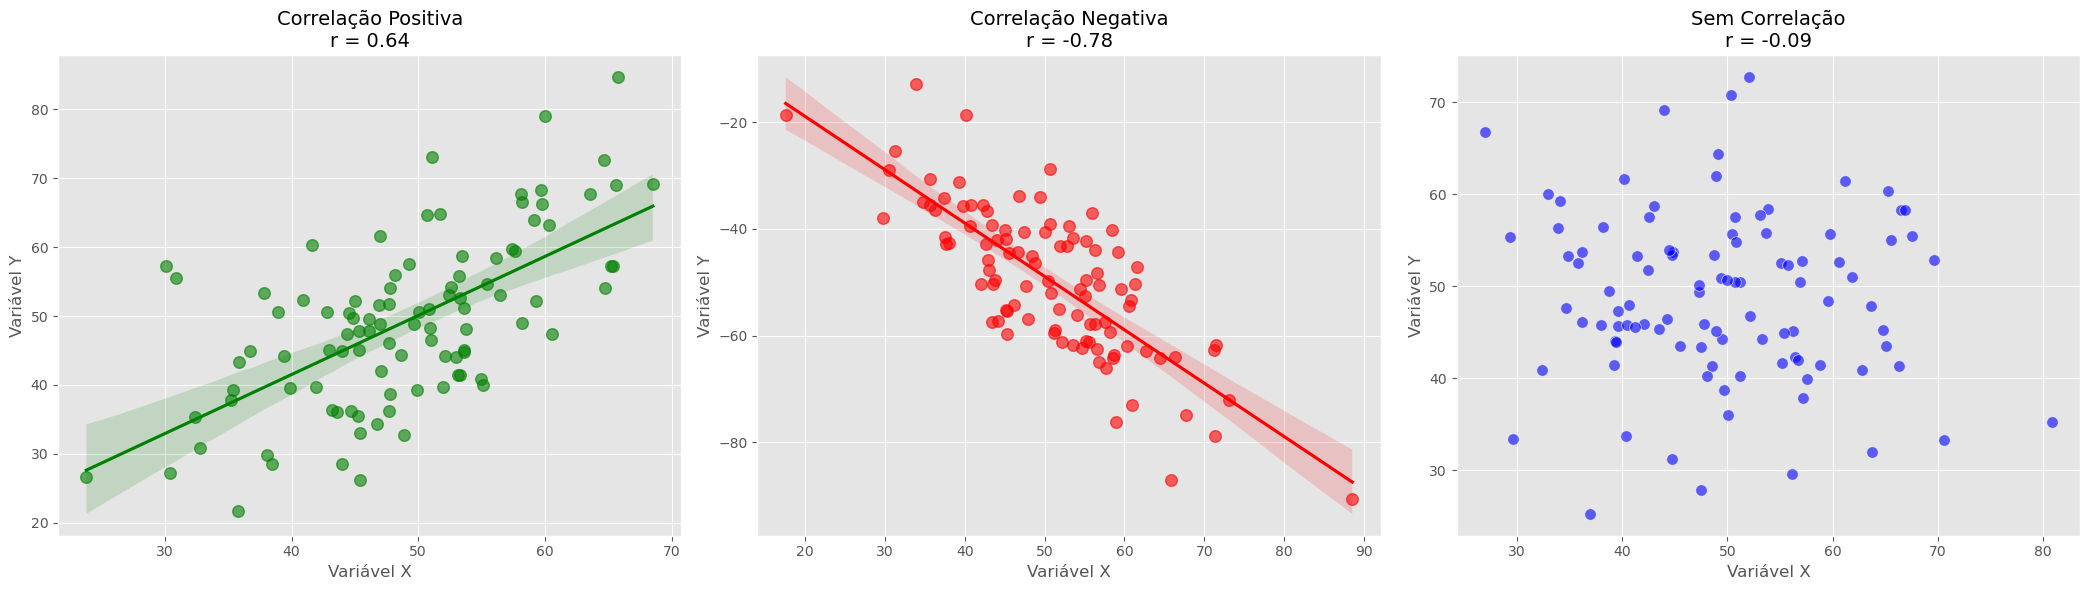

In [19]:
# Definir a semente para reprodutibilidade
np.random.seed(42)

# Número de amostras
n = 100

# Correlação Positiva
x_pos = np.random.normal(50, 10, n)
y_pos = x_pos + np.random.normal(0, 10, n)

# Correlação Negativa
x_neg = np.random.normal(50, 10, n)
y_neg = -x_neg + np.random.normal(0, 10, n)

# Sem Correlação
x_none = np.random.normal(50, 10, n)
y_none = np.random.normal(50, 10, n)

# Calcular os coeficientes de correlação de Pearson
corr_pos, _ = stats.pearsonr(x_pos, y_pos)
corr_neg, _ = stats.pearsonr(x_neg, y_neg)
corr_none, _ = stats.pearsonr(x_none, y_none)

print(f"Coeficiente de Pearson (Positiva): {corr_pos:.2f}")
print(f"Coeficiente de Pearson (Negativa): {corr_neg:.2f}")
print(f"Coeficiente de Pearson (Sem Correlação): {corr_none:.2f}")

# Criar uma figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Scatterplot com Correlação Positiva
sns.regplot(x=x_pos, y=y_pos, ax=axes[0], color='green', scatter_kws={'s':70, 'alpha':0.6})
axes[0].set_title(f'Correlação Positiva\nr = {corr_pos:.2f}', fontsize=14)
axes[0].set_xlabel('Variável X', fontsize=12)
axes[0].set_ylabel('Variável Y', fontsize=12)

# Scatterplot com Correlação Negativa
sns.regplot(x=x_neg, y=y_neg, ax=axes[1], color='red', scatter_kws={'s':70, 'alpha':0.6})
axes[1].set_title(f'Correlação Negativa\nr = {corr_neg:.2f}', fontsize=14)
axes[1].set_xlabel('Variável X', fontsize=12)
axes[1].set_ylabel('Variável Y', fontsize=12)

# Scatterplot sem Correlação
sns.scatterplot(x=x_none, y=y_none, ax=axes[2], color='blue', s=70, alpha=0.6)
axes[2].set_title(f'Sem Correlação\nr = {corr_none:.2f}', fontsize=14)
axes[2].set_xlabel('Variável X', fontsize=12)
axes[2].set_ylabel('Variável Y', fontsize=12)

# Ajustar o layout
plt.tight_layout()
plt.show()


# Correlação Linear: Positiva, Negativa e Inexistente

A **correlação linear** mede a força e a direção da relação linear entre duas variáveis numéricas. O coeficiente de correlação de Pearson é uma métrica amplamente utilizada para quantificar essa relação, variando de -1 a 1. A seguir, explicamos os três tipos principais de correlação linear:

1. **Correlação Linear Positiva**: Coeficiente de Pearson próximo de **1**.
2. **Correlação Linear Negativa**: Coeficiente de Pearson próximo de **-1**.
3. **Correlação Não Existente**: Coeficiente de Pearson próximo de **0**.

## 1. Correlação Linear Positiva

### Definição

Uma **correlação linear positiva** ocorre quando, à medida que uma variável aumenta, a outra também tende a aumentar. Isso indica uma relação direta entre as duas variáveis.

### Fórmula do Coeficiente de Correlação de Pearson

\$
r = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}
\$

Onde:
- \$ r \$ é o coeficiente de correlação de Pearson.
- \$ x_i \$ e \$ y_i \$ são os valores das variáveis X e Y.
- \$ \overline{x} \$ e \$ \overline{y} \$ são as médias das variáveis X e Y.
- \$ n \$ é o número de observações.

### Exemplo Numérico

Considere os seguintes dados de altura (cm) e peso (kg) de 5 indivíduos:

| Indivíduo | Altura (\$X\$) | Peso (\$Y\$) |
|-----------|----------------|--------------|
| 1         | 150            | 50           |
| 2         | 160            | 60           |
| 3         | 170            | 70           |
| 4         | 180            | 80           |
| 5         | 190            | 90           |

**Cálculo da Média:**

\$
\overline{x} = \frac{150 + 160 + 170 + 180 + 190}{5} = 170 \text{ cm}
\$
\$
\overline{y} = \frac{50 + 60 + 70 + 80 + 90}{5} = 70 \text{ kg}
\$

**Cálculo do Coeficiente de Pearson:**

\$
r = \frac{(150-170)(50-70) + (160-170)(60-70) + (170-170)(70-70) + (180-170)(80-70) + (190-170)(90-70)}{\sqrt{(150-170)^2 + (160-170)^2 + (170-170)^2 + (180-170)^2 + (190-170)^2} \times \sqrt{(50-70)^2 + (60-70)^2 + (70-70)^2 + (80-70)^2 + (90-70)^2}}
\$

\$
r = \frac{(−20)(−20) + (−10)(−10) + (0)(0) + (10)(10) + (20)(20)}{\sqrt{400 + 100 + 0 + 100 + 400} \times \sqrt{400 + 100 + 0 + 100 + 400}}
\$

\$
r = \frac{400 + 100 + 0 + 100 + 400}{\sqrt{1000} \times \sqrt{1000}} = \frac{1000}{1000} = 1
\$

**Interpretação:** O coeficiente de Pearson \$ r = 1 \$ indica uma **correlação linear positiva perfeita** entre altura e peso neste conjunto de dados.

*Os pontos estão alinhados em uma tendência ascendente, indicando que, conforme a altura aumenta, o peso também aumenta.*

## 2. Correlação Linear Negativa

### Definição

Uma **correlação linear negativa** ocorre quando, à medida que uma variável aumenta, a outra tende a diminuir. Isso indica uma relação inversa entre as duas variáveis.

### Fórmula do Coeficiente de Correlação de Pearson

\$
r = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}
\$

### Exemplo Numérico

Considere os seguintes dados de tempo de estudo (horas) e número de erros em um teste:

| Indivíduo | Tempo de Estudo (\$X\$) | Erros (\$Y\$) |
|-----------|--------------------------|---------------|
| 1         | 1                        | 15            |
| 2         | 2                        | 12            |
| 3         | 3                        | 9             |
| 4         | 4                        | 6             |
| 5         | 5                        | 3             |

**Cálculo da Média:**

\$
\overline{x} = \frac{1 + 2 + 3 + 4 + 5}{5} = 3 \text{ horas}
\$
\$
\overline{y} = \frac{15 + 12 + 9 + 6 + 3}{5} = 9 \text{ erros}
\$

**Cálculo do Coeficiente de Pearson:**

\$
r = \frac{(1-3)(15-9) + (2-3)(12-9) + (3-3)(9-9) + (4-3)(6-9) + (5-3)(3-9)}{\sqrt{(1-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (5-3)^2} \times \sqrt{(15-9)^2 + (12-9)^2 + (9-9)^2 + (6-9)^2 + (3-9)^2}}
\$

\$
r = \frac{(−2)(6) + (−1)(3) + (0)(0) + (1)(−3) + (2)(−6)}{\sqrt{4 + 1 + 0 + 1 + 4} \times \sqrt{36 + 9 + 0 + 9 + 36}} = \frac{−12 −3 −3 −12}{\sqrt{10} \times \sqrt{90}} = \frac{-30}{\sqrt{900}} = \frac{-30}{30} = -1
\$

**Interpretação:** O coeficiente de Pearson \$ r = -1 \$ indica uma **correlação linear negativa perfeita** entre o tempo de estudo e o número de erros neste conjunto de dados.

*Os pontos estão alinhados em uma tendência descendente, indicando que, conforme o tempo de estudo aumenta, o número de erros diminui.*

## 3. Correlação Não Existente

### Definição

Quando não há uma relação linear entre duas variáveis, dizemos que existe **correlação inexistente** ou **nenhuma correlação linear**. O coeficiente de Pearson neste caso está próximo de **0**.

### Fórmula do Coeficiente de Correlação de Pearson

\$
r = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}
\$

### Exemplo Numérico

Considere os seguintes dados de número de sapatos vendidos (\$X\$) e temperatura média diária (\$Y\$):

| Dia | Sapatos Vendidos (\$X\$) | Temperatura (°C) (\$Y\$) |
|-----|--------------------------|--------------------------|
| 1   | 20                       | 25                       |
| 2   | 22                       | 30                       |
| 3   | 21                       | 28                       |
| 4   | 23                       | 27                       |
| 5   | 19                       | 29                       |

**Cálculo da Média:**

\$
\overline{x} = \frac{20 + 22 + 21 + 23 + 19}{5} = 21 \text{ sapatos}
\$
\$
\overline{y} = \frac{25 + 30 + 28 + 27 + 29}{5} = 27.8 \text{°C}
\$

**Cálculo do Coeficiente de Pearson:**

\$
r = \frac{(20-21)(25-27.8) + (22-21)(30-27.8) + (21-21)(28-27.8) + (23-21)(27-27.8) + (19-21)(29-27.8)}{\sqrt{(20-21)^2 + (22-21)^2 + (21-21)^2 + (23-21)^2 + (19-21)^2} \times \sqrt{(25-27.8)^2 + (30-27.8)^2 + (28-27.8)^2 + (27-27.8)^2 + (29-27.8)^2}}
\$

\$
r = \frac{(−1)(−2.8) + (1)(2.2) + (0)(0.2) + (2)(−0.8) + (−2)(1.2)}{\sqrt{1 + 1 + 0 + 4 + 4} \times \sqrt{7.84 + 4.84 + 0.04 + 0.64 + 1.44}} = \frac{2.8 + 2.2 + 0 − 1.6 − 2.4}{\sqrt{10} \times \sqrt{14.8}} = \frac{1}{\sqrt{10} \times 3.847} \approx \frac{1}{12.172} \approx 0.082
\$

**Interpretação:** O coeficiente de Pearson \$ r \approx 0.082 \$ indica **nenhuma correlação linear** significativa entre o número de sapatos vendidos e a temperatura média diária neste conjunto de dados.

*Os pontos estão dispersos sem um padrão linear aparente, indicando ausência de correlação entre as variáveis.*

## Resumo das Correlações

| Tipo de Correlação          | Coeficiente de Pearson (\$ r \$) | Interpretação                                        |
|-----------------------------|-----------------------------------|------------------------------------------------------|
| **Correlação Positiva**     | Próximo de **1**                  | À medida que \$ X \$ aumenta, \$ Y \$ também aumenta. |
| **Correlação Negativa**     | Próximo de **-1**                 | À medida que \$ X \$ aumenta, \$ Y \$ diminui.        |
| **Nenhuma Correlação**      | Próximo de **0**                  | Não há relação linear entre \$ X \$ e \$ Y \$.       |



## 6. Calculando Estatísticas Básicas

Vamos calcular a **média**, **mediana**, **moda**, **desvio padrão**, **intervalo** e **desvio médio** para a coluna `age`.


In [21]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns

# Carregar o conjunto de dados Titanic
titanic = sns.load_dataset('titanic')

# Seleciona a coluna idade e remove valores ausentes
age = titanic['age'].dropna()

# Calcula as estatísticas
mean_age = age.mean()
median_age = age.median()
mode_age = age.mode()[0]
std_dev_age = age.std()
range_age = age.max() - age.min()
mean_deviation_age = (age - mean_age).abs().mean()  # Cálculo manual do desvio médio

# Exibe os resultados
print(f"Média de Idade: {mean_age:.2f}")
print(f"Mediana de Idade: {median_age:.2f}")
print(f"Moda de Idade: {mode_age:.2f}")
print(f"Desvio Padrão da Idade: {std_dev_age:.2f}")
print(f"Intervalo de Idade: {range_age:.2f}")
print(f"Desvio Médio da Idade: {mean_deviation_age:.2f}")


Média de Idade: 29.70
Mediana de Idade: 28.00
Moda de Idade: 24.00
Desvio Padrão da Idade: 14.53
Intervalo de Idade: 79.58
Desvio Médio da Idade: 11.32


**Explicação:**
- **Média:** Idade média.
  
  **Fórmula:**
  \$
  \text{Média} (\mu) = \frac{\sum_{i=1}^{n} x_i}{n}
  \$
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros: 20, 22, 24, 24, 26.
  
  \$
  \mu = \frac{20 + 22 + 24 + 24 + 26}{5} = \frac{116}{5} = 23.2
  \$
  
  **Interpretação:** A idade média dos passageiros é de 23,2 anos.

- **Mediana:** Valor central quando as idades estão ordenadas.
  
  **Fórmula:**
  
  Para um conjunto de dados ordenado, a mediana é o valor que está no meio do conjunto. Se o número de observações \$ n \$ for ímpar, a mediana é o valor na posição \$ \frac{n+1}{2} \$. Se \$ n \$ for par, a mediana é a média dos dois valores centrais.
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros ordenadas: 20, 22, 24, 24, 26.
  
  Como \$ n = 5 \$ (ímpar), a mediana é o terceiro valor:
  
  \$
  \text{Mediana} = 24
  \$
  
  **Interpretação:** A idade mediana dos passageiros é de 24 anos.

- **Moda:** Idade que ocorre com mais frequência.
  
  **Fórmula:**
  
  A moda é o valor que aparece com maior frequência em um conjunto de dados.
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros: 20, 22, 24, 24, 26.
  
  \$
  \text{Moda} = 24
  \$
  
  **Interpretação:** A idade mais comum (moda) dos passageiros é de 24 anos.

- **Desvio Padrão:** Mede a dispersão das idades.
  
  **Fórmula:**
  \$
  \text{Desvio Padrão} (\sigma) = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}
  \$
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros: 20, 22, 24, 24, 26.
  
  Primeiro, calculamos a média (\$ \mu = 23.2 \$).
  
  \$
  \begin{align*}
  \sigma &= \sqrt{\frac{(20 - 23.2)^2 + (22 - 23.2)^2 + (24 - 23.2)^2 + (24 - 23.2)^2 + (26 - 23.2)^2}{5}} \\
         &= \sqrt{\frac{(10.24) + (1.44) + (0.64) + (0.64) + (7.84)}{5}} \\
         &= \sqrt{\frac{20.8}{5}} \\
         &= \sqrt{4.16} \\
         &\approx 2.04
  \end{align*}
  \$
  
  **Interpretação:** O desvio padrão das idades dos passageiros é de aproximadamente 2,04 anos, indicando que as idades variam, em média, 2,04 anos em torno da média.

- **Intervalo:** Diferença entre a maior e a menor idade dos passageiros.
  
  **Fórmula:**
  \$
  \text{Intervalo} = \text{Valor Máximo} - \text{Valor Mínimo}
  \$
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros: 20, 22, 24, 24, 26.
  
  \$
  \text{Intervalo} = 26 - 20 = 6
  \$
  
  **Interpretação:** O intervalo das idades dos passageiros é de 6 anos.

- **Desvio Médio:** Desvio absoluto médio em relação à média.
  
  **Fórmula:**
  \$
  \text{Desvio Médio} = \frac{\sum_{i=1}^{n} |x_i - \mu|}{n}
  \$
  
  **Exemplo Numérico:**
  
  Considere as idades dos passageiros: 20, 22, 24, 24, 26.
  
  Primeiro, calculamos a média (\$ \mu = 23.2 \$).
  
  \$
  \begin{align*}
  \text{Desvio Médio} &= \frac{|20 - 23.2| + |22 - 23.2| + |24 - 23.2| + |24 - 23.2| + |26 - 23.2|}{5} \\
                      &= \frac{3.2 + 1.2 + 0.8 + 0.8 + 2.8}{5} \\
                      &= \frac{8.8}{5} \\
                      &= 1.76
  \end{align*}
  \$
  
  **Interpretação:** O desvio médio das idades dos passageiros em relação à média é de 1,76 anos.

---

### Resumo das Fórmulas e Exemplos

| Medida             | Fórmula                                            | Exemplo Numérico                                                    | Resultado |
|--------------------|----------------------------------------------------|----------------------------------------------------------------------|-----------|
| **Média**          | \$\mu = \frac{\sum_{i=1}^{n} x_i}{n}\$            | \$\mu = \frac{20 + 22 + 24 + 24 + 26}{5} = 23.2\$                   | 23,2 anos |
| **Mediana**        | Valor central em dados ordenados                   | Mediana de [20, 22, 24, 24, 26] é 24                                | 24 anos   |
| **Moda**           | Valor mais frequente                               | Moda de [20, 22, 24, 24, 26] é 24                                   | 24 anos   |
| **Desvio Padrão**  | \$\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{n}}\$  | \$\sigma \approx 2,04\$                                              | 2,04 anos |
| **Intervalo**      | \$\text{Máximo} - \text{Mínimo}\$                  | \$26 - 20 = 6\$                                                      | 6 anos    |
| **Desvio Médio**   | \$\frac{\sum |x_i - \mu|}{n}\$                      | \$\frac{3.2 + 1.2 + 0.8 + 0.8 + 2.8}{5} = 1,76\$                    | 1,76 anos |




## 7. Criando uma Nova Coluna com Quartis

Vamos criar uma nova coluna que categoriza os passageiros em quartis com base em sua tarifa.



In [24]:
# Define os rótulos dos quartis
quartile_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Cria a nova coluna 'fare_quartile'
titanic['fare_quartile'] = pd.qcut(titanic['fare'], 4, labels=quartile_labels)

# Exibe as primeiras linhas com a nova coluna
titanic[['fare', 'fare_quartile']].head()


,fare,fare_quartile
0,7.2500,Q1
1,71.2833,Q4
2,7.9250,Q2
3,53.1000,Q4
4,8.0500,Q2


**Explicação:**
- `pd.qcut` divide os dados da coluna `fare` em 4 quartis de tamanho igual.
- A nova coluna `fare_quartile` atribui cada tarifa a Q1, Q2, Q3 ou Q4.

## 8. Criando um Gráfico de Barras

Um **gráfico de barras** exibe a contagem de observações em cada categoria de uma variável categórica.

### Exemplo: Contagem de Passageiros por Classe



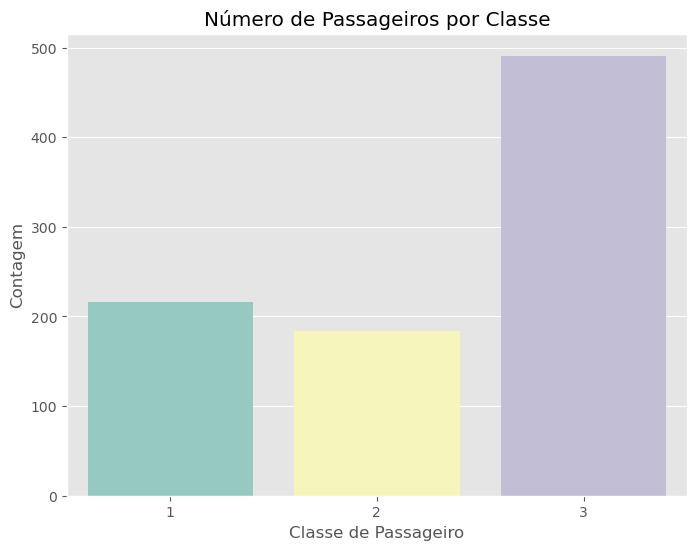

In [27]:
# Plota um gráfico de barras da contagem de passageiros por classe
plt.figure(figsize=(8,6))
sns.countplot(x='pclass', data=titanic, palette='Set3')
plt.title('Número de Passageiros por Classe')
plt.xlabel('Classe de Passageiro')
plt.ylabel('Contagem')
plt.show()



**Explicação:**
- `sns.countplot` conta automaticamente o número de ocorrências em cada categoria.
- `x='pclass'` especifica a variável categórica a ser plotada.

## 9. Criando um Gráfico de Pizza

Um **gráfico de pizza** mostra a proporção das categorias em um gráfico circular.

### Exemplo: Taxa de Sobrevivência



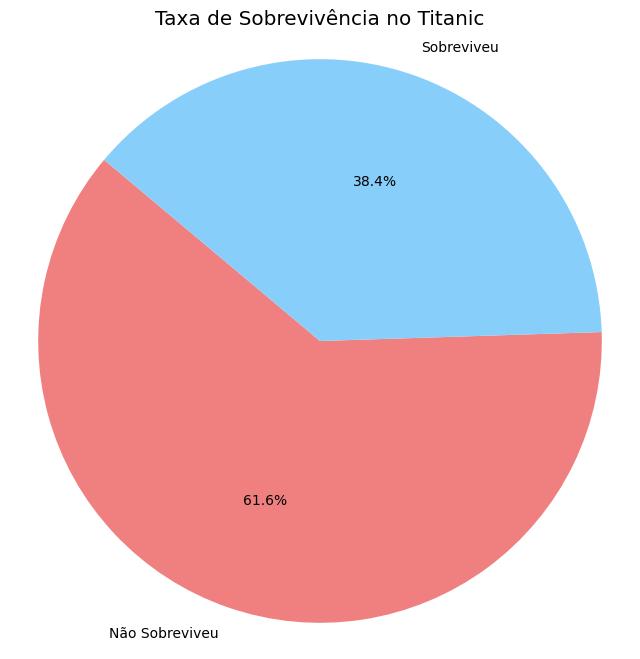

In [30]:
# Calcula as contagens de sobrevivência
survival_counts = titanic['survived'].value_counts()
labels = ['Não Sobreviveu', 'Sobreviveu']
colors = ['lightcoral', 'lightskyblue']

# Plota um gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Taxa de Sobrevivência no Titanic')
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()



**Explicação:**
- `value_counts()` conta o número de sobreviventes e não sobreviventes.
- `autopct='%1.1f%%'` exibe a porcentagem em cada fatia.
- `startangle=140` rotaciona o início do gráfico de pizza para melhor visualização.

# Bons estudos!